In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import itertools
import copy
from scipy.stats import entropy
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# Read data from the CSV into a dataframe

loc = "../Datasets/serie_A/"

in_filestandings = loc + "ISAStandings.csv"

raw_data_18 = pd.read_csv(loc + 'final_dataset_serieA_extended.csv')

In [3]:
# Parse data as time 
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%d/%m/%y').date()
    

def parse_date_other(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%d/%m/%Y').date()

#raw_data_18.Date = raw_data_18.Date.apply(parse_date)

In [4]:
playing_statistics_18 = raw_data_18

In [9]:
def get_scores(playing_stat, team):
    scoresHome = pd.DataFrame({
         'Attack':  playing_stat[playing_stat.HomeTeam == team].HomeAttack,
         'Medium':  playing_stat[playing_stat.HomeTeam == team].HomeMedium,
         'Defense': playing_stat[playing_stat.HomeTeam == team].HomeDefense,
         'GK': playing_stat[playing_stat.HomeTeam == team].HomeGK,
         'Total' : playing_stat[playing_stat.HomeTeam == team].HomeAttack+\
                    playing_stat[playing_stat.HomeTeam == team].HomeMedium+\
                    playing_stat[playing_stat.HomeTeam == team].HomeDefense+\
                    playing_stat[playing_stat.HomeTeam == team].HomeGK})
    scoresAway = pd.DataFrame({
         'Attack': playing_stat[playing_stat.AwayTeam == team].AwayAttack,
         'Medium':playing_stat[playing_stat.AwayTeam == team].AwayMedium,
         'Defense': playing_stat[playing_stat.AwayTeam == team].AwayDefense,
         'GK': playing_stat[playing_stat.AwayTeam == team].AwayGK,
         'Total' : playing_stat[playing_stat.AwayTeam == team].AwayAttack+\
                    playing_stat[playing_stat.AwayTeam == team].AwayMedium+\
                    playing_stat[playing_stat.AwayTeam == team].AwayDefense+\
                    playing_stat[playing_stat.AwayTeam == team].AwayGK})
    return scoresHome, scoresAway

def plot_team(team, row_number, n_rows, n_last_pts = 0):
    scoresHome, scoresAway = get_scores(playing_statistics_18, team)
    n_data, _ = scoresHome.shape
    n_data = np.arange(n_data)
    n = n_data
    if n_last_pts!=0:
        n = n_last_pts
    plt.subplot(n_rows,2,row_number)
    plt.plot(n_data[-n:], scoresHome.Attack[-n:], label='Attack')
    plt.plot(n_data[-n:], scoresHome.Medium[-n:], label='Medium')
    plt.plot(n_data[-n:], scoresHome.Defense[-n:], label='Defense')
    plt.plot(n_data[-n:], scoresHome.GK[-n:], label='GK')
    plt.plot(n_data[-n:], scoresHome.Total[-n:], label='Total')
    plt.axhline(0, color='k')
    plt.title(team+' home')
    plt.legend()
    plt.grid()
    
    n_data, _ = scoresAway.shape
    n_data = np.arange(n_data)
    plt.subplot(n_rows,2,(row_number+1) )
    plt.plot(n_data[-n:], scoresAway.Attack[-n:])
    plt.plot(n_data[-n:], scoresAway.Medium[-n:])
    plt.plot(n_data[-n:], scoresAway.Defense[-n:])
    plt.plot(n_data[-n:], scoresAway.GK[-n:])
    plt.plot(n_data[-n:], scoresAway.Total[-n:])
    plt.axhline(0, color='k')
    plt.title(team+ ' away')
    plt.grid()
    #plt.legend()

['Atalanta' 'Bari' 'Benevento' 'Bologna' 'Brescia' 'Cagliari' 'Carpi'
 'Catania' 'Cesena' 'Chievo' 'Crotone' 'Empoli' 'Fiorentina' 'Frosinone'
 'Genoa' 'Inter' 'Juventus' 'Lazio' 'Lecce' 'Livorno' 'Milan' 'Napoli'
 'Novara' 'Palermo' 'Parma' 'Pescara' 'Roma' 'Sampdoria' 'Sassuolo' 'Siena'
 'Spal' 'Torino' 'Udinese' 'Verona']


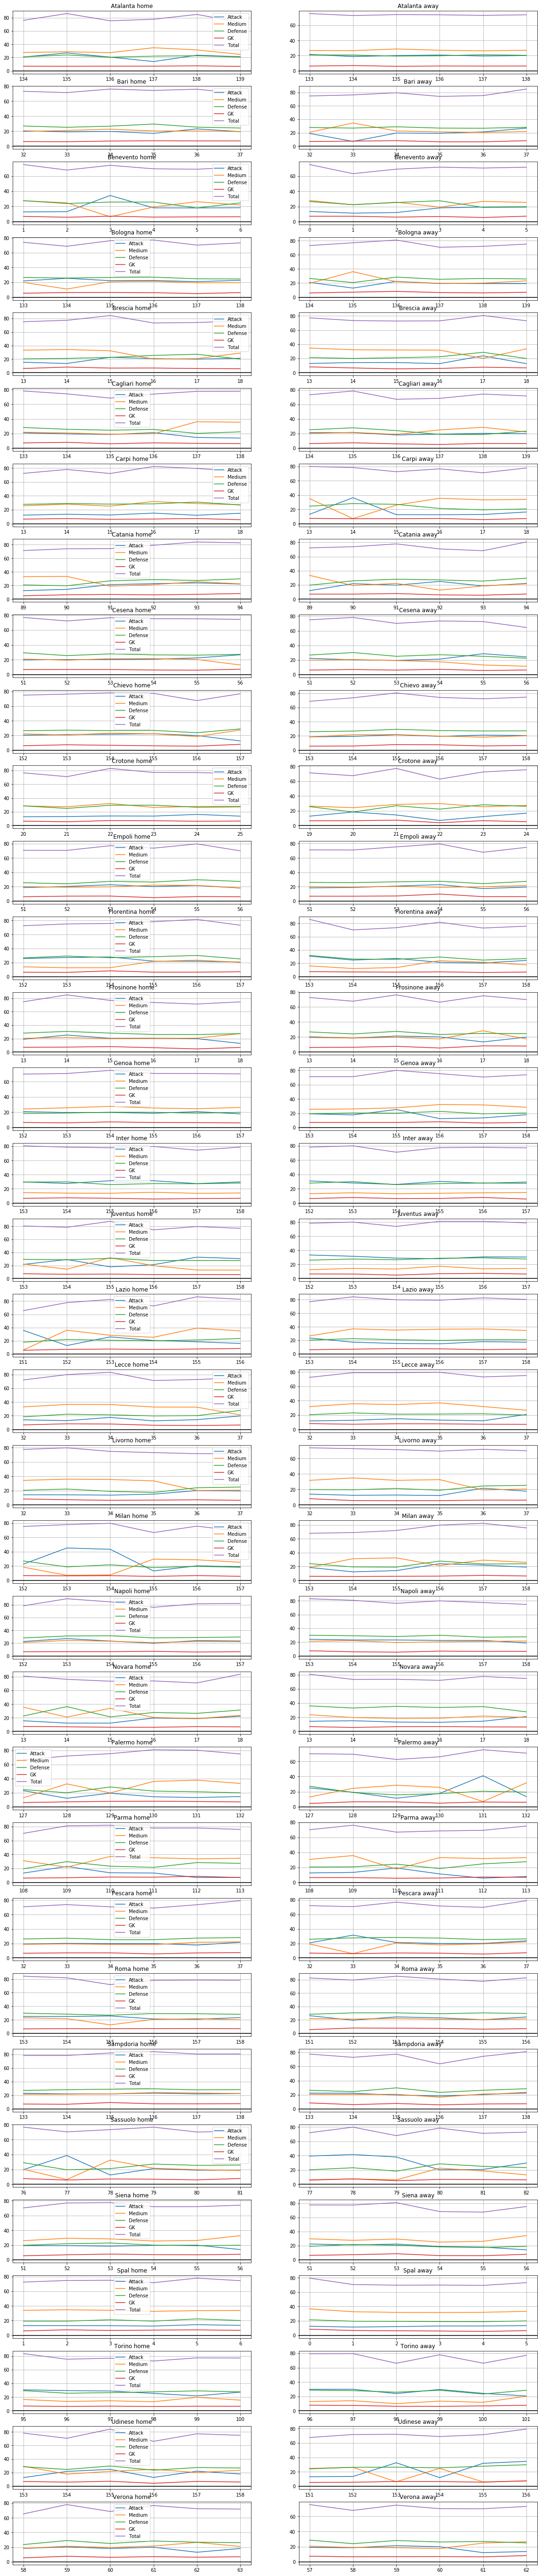

In [10]:
team_names = np.sort( playing_statistics_18.HomeTeam.unique() )
print(np.sort( playing_statistics_18.HomeTeam.unique() ))

i = 1;

plt.figure(figsize=(20, 100))
for team in team_names:
    plot_team(team, i, len(team_names), 6)
    
    i+=2

plt.savefig('team scores.eps')

            Date   HomeTeam  AwayTeam FTR       HTP       ATP  HomeAttack  \
3044  2017-08-20    Crotone     Milan   A  0.000000  0.000000       12.30   
3056  2017-08-27      Milan  Cagliari   H  1.500000  0.000000       22.80   
3066  2017-09-10      Lazio     Milan   H  1.333333  2.000000       25.90   
3074  2017-09-17      Milan   Udinese   H  1.500000  0.750000       45.20   
3086  2017-09-20      Milan      Spal   H  1.800000  0.800000       43.40   
3096  2017-09-24  Sampdoria     Milan   H  1.833333  2.000000       22.00   
3105  2017-10-01      Milan      Roma   A  1.714286  2.142857       13.30   
3115  2017-10-15      Inter     Milan   H  2.375000  1.500000       31.50   
3125  2017-10-22      Milan     Genoa   D  1.333333  0.555556       20.40   
3133  2017-10-25     Chievo     Milan   A  1.500000  1.300000       19.90   
3139  2017-10-28      Milan  Juventus   A  1.300000  2.200000       19.10   
3157  2017-11-05   Sassuolo     Milan   A  0.666667  1.333333       18.90   

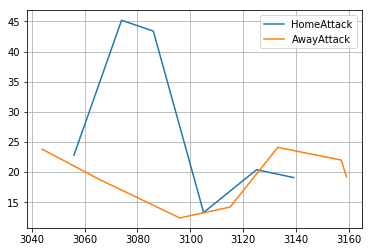

In [7]:
milan_all = raw_data_18[(raw_data_18.HomeTeam == 'Milan') | (raw_data_18.AwayTeam == 'Milan')]
milan = milan_all.loc[3044:, :]#milan_all[ milan_all.Date > dt(2017, 7, 1)]

milan.drop(['Unnamed: 0', 'MW', 'HTFormPtsStr', 'ATFormPtsStr', 'FTHG', 'FTAG',
           'HTGS', 'ATGS', 'HTGC', 'ATGC','HomeTeamLP', 'AwayTeamLP','DiffPts','HTFormPts','ATFormPts',
           'HM4','AM4','HTLossStreak5','ATLossStreak5','HTWinStreak5','ATWinStreak5',
           'HTWinStreak3','HTLossStreak3','ATWinStreak3','ATLossStreak3', 'ENTROPY_B365', 'ENTROPY_BW',
           'ENTROPY_IW', 'ENTROPY_LB', 'ENTROPY_WH', 'ENTROPY_H', 'ENTROPY_D', 'ENTROPY_A',
           'B365H', 'BWH', 'IWH', 'LBH', 'WHH', 'B365D', 'BWD', 'IWD', 'LBD', 'WHD', 'B365A', 'BWA', 'IWA',
            'LBA', 'WHA',
            'HM1', 'HM2', 'HM3', 'AM1', 'AM2', 'AM3', 'HTGD', 'ATGD', 'DiffFormPts',  'DiffLP',  'HomeScores',  'AwayScores',  'HomeAwayDifference'],1, inplace=True)

print(milan)

mh = milan[milan.HomeTeam == 'Milan']
ma = milan[milan.AwayTeam == 'Milan']
n_data, _ = mh.shape
n_data = np.arange(n_data)
plt.plot(mh.HomeAttack, label='HomeAttack')
plt.plot(ma.AwayAttack, label='AwayAttack')
plt.legend()
plt.grid()